# 第4回講義 演習

## 課題1. ロジスティック回帰の実装と学習

In [2]:
from sklearn.utils import shuffle

import numpy as np

np.random.seed(1234)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

### 1. シグモイド関数とその微分

In [7]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def deriv_sigmoid(x):
    return sigmoid(x) *(1-sigmoid(x))

### 2. データセットの設定と重みの定義

In [8]:
# OR
train_X = np.array([[0, 1], [1, 0], [0, 0], [1, 1]])
train_y = np.array([[1], [1], [0], [1]])
test_X, test_y = train_X, train_y

# weights
W = np.random.uniform(low=-0.08, high=0.08, size=(2, 1)).astype('float32')
b = np.zeros(1).astype('float32')

### 3. train関数とtest関数

##### 誤差関数
* 負の対数尤度関数 (Negative Loglikelihood Function）
* 交差エントロピー誤差関数ともいう

$$ E ( {\bf \theta} ) =  -\sum^N_{i=1} \left[ t_i \log y ({\bf x}_i ; {\bf \theta}) + (1 - t_i) \log \{ 1 - y ({\bf x}_i ; {\bf \theta}) \}\right] $$

In [1]:
# def train(x, t, eps=1.0):
def train(x, t, eps=1.0):
    global W, b # to access variables that defined outside of this function.
    
    # Forward Propagation
    y = sigmoid(np.matmul(x, W) + b)
    
    # Back Propagation (Cost Function: Negative Loglikelihood)
    cost = np.sum(-t*np.log(y)-(1-t)*np.log(1-y))
    delta = y-t
    
    # Update Parameters
    dW = np.matmul(x.T, delta)
    db = np.matmul(np.ones(len(x)), delta)
    W = W - eps*dW
    b = b - eps*db

    return cost

def test(x, t):
    # Test Cost
    y = sigmoid(np.matmul(x, W) + b)
    cost = np.sum(-t*np.log(y)-(1-t)*np.log(1-y))
    return cost, y

### 4. 学習

In [7]:
for x, y in zip(train_X, train_y):
    print (x, y)

[0 1] [1]
[1 0] [1]
[0 0] [0]
[1 1] [1]


In [12]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

In [13]:
# Epoch
for epoch in range(1000):
    # Online Learning
    for x, y in zip(train_X, train_y):
        cost = train(x[np.newaxis, :], y[np.newaxis, :])
    cost, pred_y = test(test_X, test_y)
print(cost)
print(pred_y)

0.0112934237987
[[ 0.99756028]
 [ 0.99748014]
 [ 0.00154664]
 [ 0.00476845]]


## 課題2. 活性化関数とその微分の実装

###  1. シグモイド関数とその微分

In [9]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def deriv_sigmoid(x):
    return sigmoid(x)*(1 - sigmoid(x))

### 2. ソフトマックス関数とその微分

In [10]:
def softmax(x):
    exp_x = np.exp(x)
    return exp_x/np.sum(exp_x, axis=1, keepdims=True)


def deriv_softmax(x):
    return softmax(x)*(1 - softmax(x))

### 3. tanh関数とその微分

In [11]:
def tanh(x):
    return np.tanh(x)

def deriv_tanh(x):
    return 1 - tanh(x)**2

## 課題3. 多層パーセプトロンの実装と学習

### 1. データセットの設定と重みの定義

In [4]:
# XOR
train_X = np.array([[0, 1], [1, 0], [0, 0], [1, 1]])
train_y = np.array([[1], [1], [0], [0]])
test_X, test_y = train_X, train_y

# Layer1 weights
W1 = np.random.uniform(low=-0.08, high=0.08, size=(2, 3)).astype('float32')
b1 = np.zeros(3).astype('float32')

# Layer2 weights
W2 = np.random.uniform(low=-0.08, high=0.08, size=(3, 1)).astype('float32')
b2 = np.zeros(1).astype('float32')

In [14]:
test(test_X, test_y)


(0.011293423798715292, array([[ 0.99756028],
        [ 0.99748014],
        [ 0.00154664],
        [ 0.00476845]]))

### 2.train関数とtest関数

##### 誤差関数
* 負の対数尤度関数 (Negative Loglikelihood Function）
* 交差エントロピー誤差関数ともいう

$$ E ( {\bf \theta} ) =  -\sum^N_{i=1} \left[ t_i \log y ({\bf x}_i ; {\bf \theta}) + (1 - t_i) \log \{ 1 - y ({\bf x}_i ; {\bf \theta}) \}\right] $$

In [7]:
def train(x, t, eps=1.0):
    global W1, b1, W2, b2 # to access variables that defined outside of this function.
    
    # Forward Propagation Layer1
    u1 = np.matmul(x, W1) + b1
    z1 = sigmoid(u1)
    
    # Forward Propagation Layer2
    u2 = np.matmul(z1, W2) + b2
    z2 = sigmoid(u2)
    
    # Back Propagation (Cost Function: Negative Loglikelihood)
    y = z2
    cost = cross_entropy_error(y,t)
#     cost = np.sum(-t*np.log(y) - (1 - t)*np.log(1 - y))
    delta_2 = y - t # Layer2 delta
    delta_1 = deriv_sigmoid(u1) * np.matmul(delta_2, W2.T) # Layer1 delta
#     from IPython.core.debugger import Pdb; Pdb().set_trace()
    # Update Parameters Layer1
    dW1 = np.matmul(x.T, delta_1)
    db1 = np.matmul(np.ones(len(x)), delta_1)
    W1 = W1 - eps*dW1
    b1 = b1 - eps*db1
    
    # Update Parameters Layer2
    dW2 = np.matmul(z1.T, delta_2)
    db2 = np.matmul(np.ones(len(z1)), delta_2)
    W2 = W2 - eps*dW2
    b2 = b2 - eps*db2

    return cost

def test(x, t):
    # Forward Propagation Layer1
    u1 = np.matmul(x, W1) + b1
    z1 = sigmoid(u1)
    
    # Forward Propagation Layer2
    u2 = np.matmul(z1, W2) + b2
    z2 = sigmoid(u2)
    
    y = z2
    
    # Test Cost
    cost = np.sum(-t*np.log(y)-(1-t)*np.log(1-y))
    return cost, y

In [19]:
test_X.shape

(4, 2)

In [18]:
W1.shape

(2, 3)

In [15]:
np.matmul(test_X, W1)

array([[ -7.55398404,  -5.73147466,  -4.80525976],
       [ -7.37030493,  -5.71143362,  -4.60119718],
       [  0.        ,   0.        ,   0.        ],
       [-14.92428897, -11.44290828,  -9.40645694]])

In [20]:
b1.shape

(3,)

### 3. 学習

In [14]:
for x, y in zip(train_X, train_y):
    print (x,y)

[0 1] [1]
[1 0] [1]
[0 0] [0]
[1 1] [0]


In [17]:
# Epoch
cost_array = []
cost_sum = []
for epoch in range(1000):
    # Online Learning
    for x, y in zip(train_X, train_y):
        cost = train(x[np.newaxis, :], y[np.newaxis, :])
        np.append(cost_sum, cost)
    cost, pred_y = test(test_X, test_y)
    cost_array = np.append(cost_array, cost)

print(cost)
print(pred_y)


0.00953162260909
[[ 0.99788267]
 [ 0.99785696]
 [ 0.0018215 ]
 [ 0.00343762]]


In [16]:
np.array(cost_array).shape

(1,)

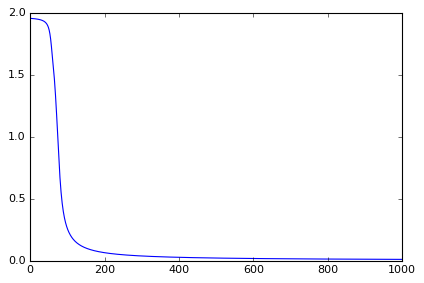

In [18]:
plt.plot(np.arange(1000), np.array(cost_array))